In [1]:
5+5

10

Method 1 probability: 0.38


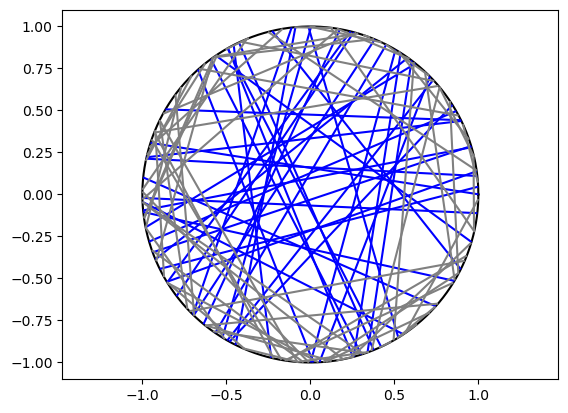

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import collections  as mc
from math import sqrt

def polar(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return (x, y)


def method1():
    # simulate two uniform random variables theta1 and theta2 on the interval (0,2*pi) to describe the angles of the two points
    # then the end points of the chord (in Cartesian coordinates) are: 
    # point1: x1 = r*cos(theta1), y1 = r*sin(theta1)
    # point2: x2 = r*cos(theta2), y2 = r*sin(theta2)
    
    # generate angles
    theta1 = circumference * np.random.uniform(0, 1, n) 
    theta2 = circumference * np.random.uniform(0, 1, n)
    
    # calculate chord endpoints
    x1 = x0 + r * np.cos(theta1)
    y1 = y0 + r * np.sin(theta1)
    x2 = x0 + r * np.cos(theta2)
    y2 = y0 + r * np.sin(theta2)
    
    # length of chord
    length = np.hypot(x1 - x2, y1 - y2)
    
    # draw circle
    fig, ax = plt.subplots(1, 1)
    ax.plot(x0 + xp, y0 + yp, color='k')
    ax.axis('equal')
    
    # generate chords
    good_chords = []
    chords = []
    for i in range(n):
        if length[i] > triangle_side:
            good_chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
        else:
            chords.append([(x1[i], y1[i]), (x2[i], y2[i])])
    
    # plot chordes
    gc = mc.LineCollection(good_chords, colors='blue')
    c = mc.LineCollection(chords, colors='gray')
    ax.add_collection(gc)
    ax.add_collection(c)

   
    # calculate probability 
    probability = np.mean(length > triangle_side)
    
    print('Method {} probability: {}'.format(1, probability))
    plt.show()


# circle center
x0 = 0
y0 = 0

#circle radius
r = 1

# number of trails
n = 10 ** 2

# circle circumference angles
circumference = 2 * np.pi

# points of the equilateral triangle inscribed in the circle
top   = polar(r, np.pi/2)
right = polar(r, np.pi/2-(2*np.pi)/3)
left  = polar(r, np.pi/2+(2*np.pi)/3)
    
# side length of the equilateral triangle inscribed in the circle
triangle_side = sqrt((top[0] - right[0])**2 + (top[1]-right[1])**2)

# points of circle
t = np.linspace(0, circumference, 1000)
xp = r * np.cos(t)
yp = r * np.sin(t)


method1()